# Mackenzie's Exploration of Data
Mackenzie's quick exploration of different relationships between WHO data. 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

dfAfrica = pd.read_csv("africa.csv")
dfAmericas = pd.read_csv("americas.csv")
dfEMed = pd.read_csv("mediterranean.csv")
dfEurope = pd.read_csv("europe.csv")
dfSEAsia = pd.read_csv("asia.csv")
dfWPacific = pd.read_csv("pacific.csv")

df = [dfAfrica, dfAmericas, dfEMed, dfEurope, dfSEAsia, dfWPacific]

result = pd.concat(df)

print result.head()

               GHO PUBLISHSTATE  YEAR REGION    AGEGROUP   SEX  Display Value  \
0  LIFE_0000000033    PUBLISHED  1990    AFR  AGE100PLUS  BTSX           60.0   
1  LIFE_0000000035    PUBLISHED  2013    AFR    AGE85-89  BTSX            4.1   
2  LIFE_0000000035    PUBLISHED  2000    AFR    AGE55-59  BTSX           18.8   
3  LIFE_0000000032    PUBLISHED  2012    AFR    AGE45-49  FMLE         3411.0   
4  LIFE_0000000035    PUBLISHED  1990    AFR    AGE25-29   MLE           38.8   

      Numeric  Low  High  Comments  
0    60.01235  NaN   NaN       NaN  
1     4.14085  NaN   NaN       NaN  
2    18.76440  NaN   NaN       NaN  
3  3410.96100  NaN   NaN       NaN  
4    38.79806  NaN   NaN       NaN  


We got data. Now need to fix the weird symbols in Age column.

In [5]:
def cleanData(data):
    data.AGEGROUP.replace(("AGE100PLUS", "AGE95-99", "AGE90-94", "AGE85-89", 
                             "AGE80-84", "AGE75-79", "AGE70-74", "AGE65-69", 
                             "AGE60-64", "AGE55-59", "AGE50-54", "AGE45-49", 
                             "AGE40-44", "AGE35-39", "AGE30-34", "AGE25-29", 
                             "AGE20-24", "AGE15-19", "AGE10-14", "AGE5-9", 
                             "AGE1-4", "AGELT1"), 
                          (100.0, 95.0, 90.0, 85.0, 80.0, 75.0, 70.0, 65.0, 60.0, 55.0, 50.0, 
                             45.0, 40.0, 35.0, 30.0, 25.0, 20.0, 15.0, 10.0, 5.0, 1.0, 0.5), 
                          inplace = True)
    
    data.SEX.replace(("BTSX", "FMLE", "MLE"), (2, 1, 0), inplace = True)
    
    # V not a continuous value, just for ease of referencing this column
    data.GHO.replace(("LIFE_0000000029", "LIFE_0000000030", "LIFE_0000000031", 
                      "LIFE_0000000032", "LIFE_0000000033", "LIFE_0000000034",
                      "LIFE_0000000035"),
                     (29, 30, 31, 32, 33, 34, 35), inplace = True)
    
    data.drop(["PUBLISHSTATE", "Low", "High", "Comments", "Display Value"], 
              inplace = True, axis = 1)
    return data

Meanings of values in GHO column:

29  nMx - age-specific death rate between ages x and x+n

30  nqx - probability of dying between ages x and x+n

31  lx - number of people left alive at age x

32  ndx - number of people dying between ages x and x+n

33  nLx - person-years lived between ages x and x+n

34  Tx - person-years lived above age x

35  ex - expectation of life at age x

In [6]:
cleans = cleanData(result)
print cleans.head()

   GHO  YEAR REGION  AGEGROUP  SEX     Numeric
0   33  1990    AFR       100    2    60.01235
1   35  2013    AFR        85    2     4.14085
2   35  2000    AFR        55    2    18.76440
3   32  2012    AFR        45    1  3410.96100
4   35  1990    AFR        25    0    38.79806


First I'm looking at grouping by WHO region and year. I'm interested in trends across years by region. I'm also going to try and isolate this to GHO category 35, the life expectancy. I'm curious in which regions someone can expect to live longer, and how this has evolved over time. 

In [15]:
cleans.groupby(['REGION','YEAR','GHO','AGEGROUP','SEX']).mean()

1990    2772
2013    2772
2012    2772
2000    2772
Name: YEAR, dtype: int64

Looks like there are enough divisions here that I could cleanly separate this data into different dataframes and compare the graphs. I'm setting up a function to create a different, graphable(sortting the ages to make sense continuously) dataframe for each region

In [10]:
def regionSeparate(region):
    lifeExpec=result[result.GHO==35]#only looking at life expectancy values
    regionOnly = lifeExpec[lifeExpec.REGION==region]
    bSexLE= regionOnly[regionOnly.SEX == 2] # only looking at both sexes life expectancy
    #now to sort ages
    region_sorted_ages= bSexLE.AGEGROUP.sort_values()
    
    return bSexLE, region_sorted_ages

In [14]:
afdf, afAges = regionSeparate('AFR')#africa
amdf, amAges = regionSeparate('AMR')#americas
emdf, emAges = regionSeparate('EMR') #Eastern Mediterranean
eudf, euAges = regionSeparate('EUR') # europe
wpdf, wpAges = regionSeparate('WPR') #Western Pacific
seadf, seaAges = regionSeparate('SEAR') #South-East Asia

I inititally tried to get several pcolor graphs, 2d histograms, and surface plots with Meshes made of my nparrays going, but none of these were actually effective visualization techniques. I opted for a 3D scatter plot so I could actually look at each point of data. The discrete division into 4 years makes anything continuous rather challenging. 

In [20]:
def graphExpectancies(country,df,ages):
    ax = Axes3D(plt.gcf())
    ax.scatter(
        df.YEAR.values,
        ages.values,
        df.Numeric.values

    )    
    ax.set_xlim(1989,2014)
    ax.set_ylim(0,110)
    ax.set_xlabel('Year')
    ax.set_ylabel('Age Group')
    ax.set_zlabel('Years Expected to live')

    plt.title(country +' Life expectancies across time by age')

    for ii in xrange(0,360,1):
        ax.view_init(elev=10., azim=ii)
        plt.savefig(country+"movie"+str(ii)+".png")
        
    plt.show()

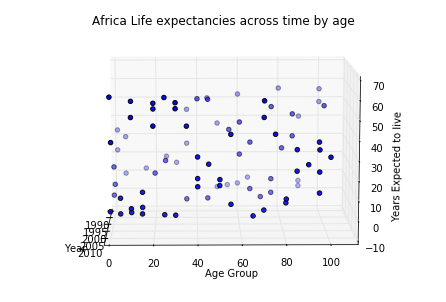

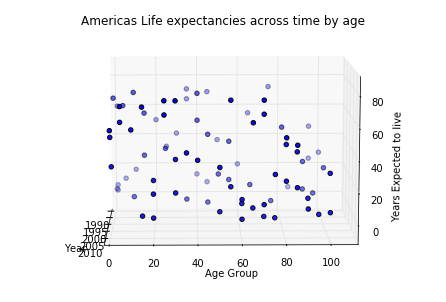

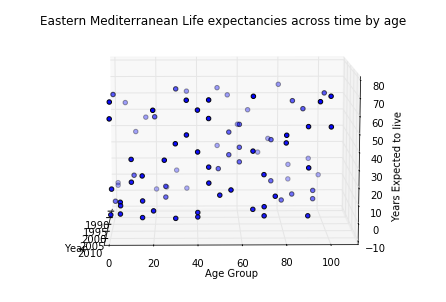

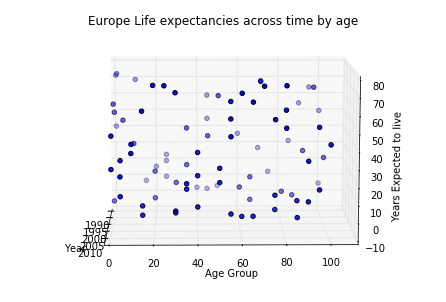

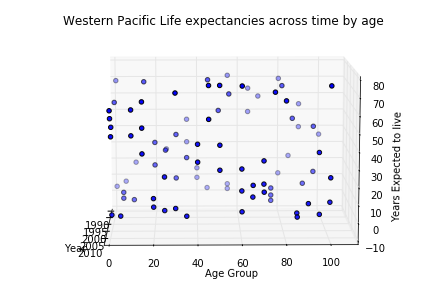

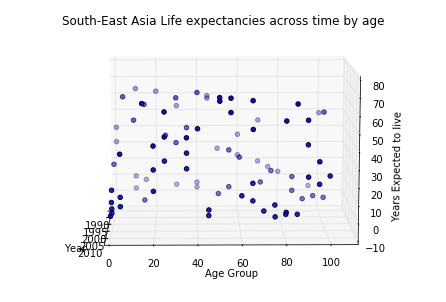

In [21]:
graphExpectancies('Africa',afdf,afAges)
graphExpectancies('Americas', amdf, amAges)
graphExpectancies('Eastern Mediterranean', emdf, emAges)
graphExpectancies('Europe', eudf, euAges)
graphExpectancies('Western Pacific', wpdf,wpAges)
graphExpectancies('South-East Asia', seadf, seaAges)

I set up the for loop to change the azimuth so I could loop around 360 degrees to get a complete view of the plot. If you haven't run this code, you should too, and then pass through all the png's to get a full view! I find it interesting that life expectancy varies drastically across Africa. However, through reading the WHO's website here: http://apps.who.int/gho/indicatorregistry/App_Main/view_indicator.aspx?iid=35 I've actually found that data from large regions where countries are low incompe can be incomplete. The WHO uses a standard modeling method developed from about 1800 life tables judged to be "of good quality." Ultimately, I'm relying on the WHO's ability to make up for lost data and predict accurately. 

I'm also seeing pretty interesting information where some regions on the whole have higher life expectancy